# 4. 개별 종목 일별 시세 수집

## 4.1 라이브러리 불러오기

In [7]:
import pandas as pd
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')

<br>

## 4.2 일별 시세 수집

- 종목 코드로 수집 가능
- 종목명을 찾아서 일별 시세를 수집해주는 함수 구현

<br>

### 4.2.1 삼성전자 일별 시세 가져오기

In [6]:
df = fdr.DataReader('005930', start='2017', end='2021')
df.head()

Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998

<AxesSubplot:xlabel='Date'>

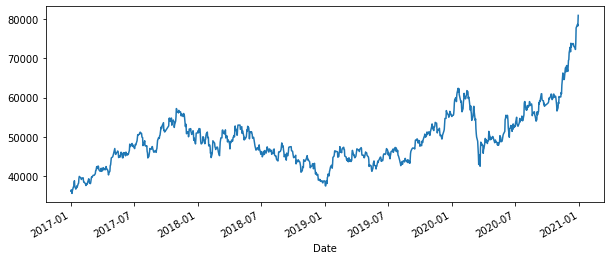

In [11]:
df['Close'].plot(figsize=(10,4))

<br>

### 4.2.2 상장종목 목록 가져오기

In [13]:
df_krx = pd.read_csv('krx.csv')
df_krx.shape

(2614, 10)

In [14]:
df_krx.head()

Symbol  Market    Name           Sector             Industry ListingDate  \
0  060310  KOSDAQ      3S    특수 목적용 기계 제조업          반도체 웨이퍼 캐리어  2002-04-23   
1  095570   KOSPI  AJ네트웍스  산업용 기계 및 장비 임대업  렌탈(파렛트, OA장비, 건설장비)  2015-08-21   
2  006840   KOSPI   AK홀딩스           기타 금융업                 지주사업  1999-08-11   
3  054620  KOSDAQ  APS홀딩스           기타 금융업          인터넷 트래픽 솔루션  2001-12-04   
4  265520  KOSDAQ   AP시스템    특수 목적용 기계 제조업          디스플레이 제조 장비  2017-04-07   

  SettleMonth      Representative                       HomePage Region  
0         03월  박종익, 김세완 (각자 대표이사)           http://www.3sref.com  서울특별시  
1         12월                 이현우         http://www.ajnet.co.kr  서울특별시  
2         12월   채형석, 이석주(각자 대표이사)  http://www.aekyunggroup.co.kr  서울특별시  
3         12월                 정기로   http://www.apsholdings.co.kr    경기도  
4         12월                 김영주     http://www.apsystems.co.kr    경기도

<br>

### 4.2.3 종목명과 종목코드 추출하기

In [16]:
df_krx[['Symbol', 'Name']].head()

Symbol    Name
0  060310      3S
1  095570  AJ네트웍스
2  006840   AK홀딩스
3  054620  APS홀딩스
4  265520   AP시스템

<br>

### 4.2.4 '빅히트' 종목코드 찾기

In [31]:
item_name = '빅히트'
df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()[0]

'352820'

<br>

### 4.2.5 종목명 입력 시 종목코드를 반환하는 함수 구현

In [39]:
def item_code_by_item_name(item_name):
    # docstring 정의 (?로 함수 설정 볼 때 표출되는 내용)
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()
    if len(item_code_list) > 0:
        return item_code_list[0]
    else:
        return False

In [42]:
item_code_by_item_name('빅히트')

'352820'

In [44]:
item_code_by_item_name('네이버')

False

In [45]:
item_code_by_item_name('NAVER')

'035420'

In [46]:
item_code_by_item_name('삼성전자')

'005930'

In [47]:
item_code_by_item_name('셀트리온')

'068270'

<br>

### 4.2.6 구현한 함수를 이용해 일별 시세 가져오기

In [48]:
fdr.DataReader(item_code_by_item_name('삼성전자'))

Open   High    Low  Close    Volume    Change
Date                                                      
1997-02-11    960    972    942    973    130180       NaN
1997-02-12    967   1022    964   1001    241110  0.028777
1997-02-13   1004   1081   1004   1049    323720  0.047952
1997-02-14   1058   1084   1049   1058    187570  0.008580
1997-02-15   1067   1076   1036   1041     77700 -0.016068
...           ...    ...    ...    ...       ...       ...
2021-01-15  89800  91800  88000  88000  33431809 -0.018952
2021-01-18  86600  87300  84100  85000  43227951 -0.034091
2021-01-19  84500  88000  83600  87000  39895044  0.023529
2021-01-20  89000  89000  86500  87200  25211127  0.002299
2021-01-21  87500  88600  86500  88100  23661537  0.010321

[6000 rows x 6 columns]